# Prboblem Statement

In [1]:
import pandas  as pd
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
train = pd.read_excel("/Users/jagdi/Downloads/Attrition Case Study.xlsx")

In [3]:
train.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Missing Data

In [5]:
train.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# EDA

In [6]:
import matplotlib.pyplot as plt

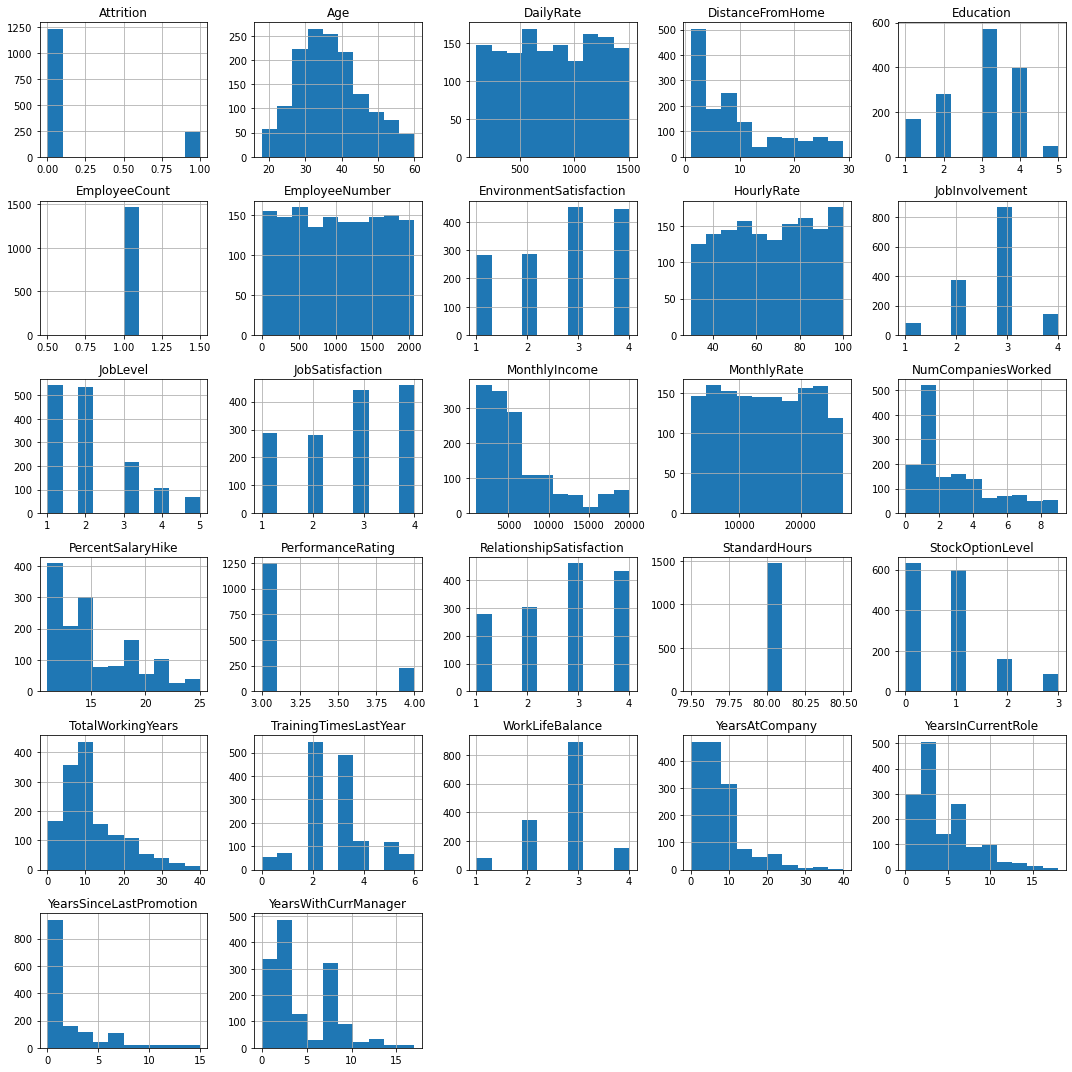

In [7]:
train.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

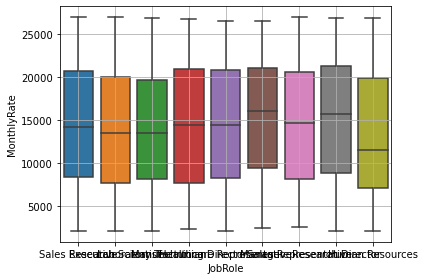

In [8]:
import seaborn as sb
sb.boxplot(y=train["MonthlyRate"],x=train["JobRole"])
plt.grid(True,alpha=1)
plt.tight_layout()
plt.show()

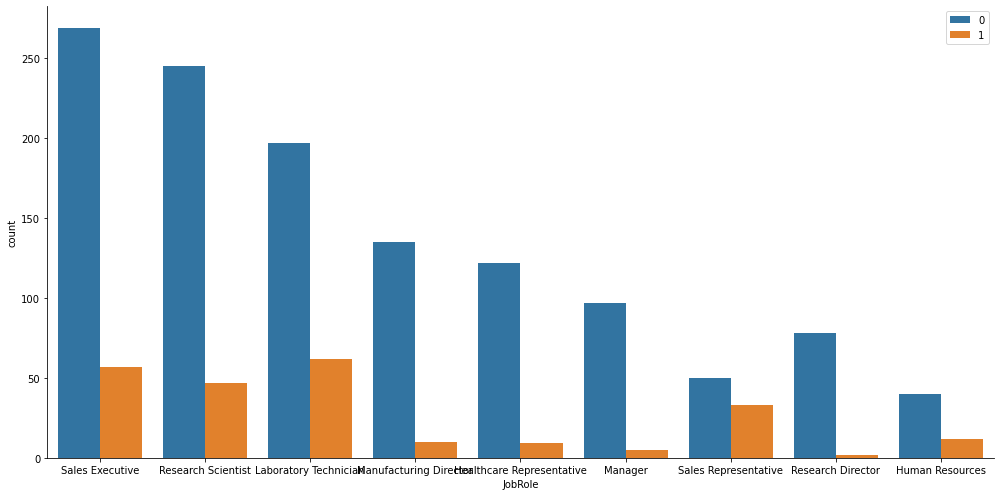

In [9]:
sb.catplot(x='JobRole',hue='Attrition',data=train,kind="count",height=7,aspect=2,legend=False)
plt.legend(loc='upper right')
plt.show()


<AxesSubplot:>

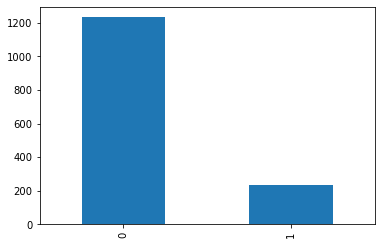

In [10]:
train["Attrition"].value_counts().plot(kind='bar')

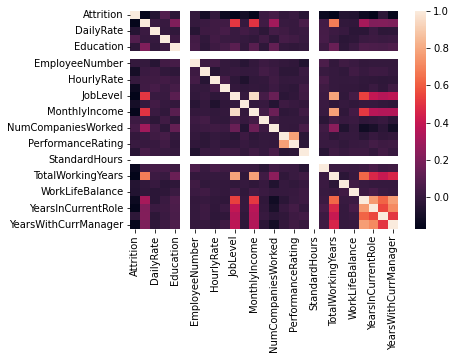

In [11]:
sb.heatmap(train.corr())
plt.show()

# Define X and Y

In [12]:
Y = train[["MonthlyRate"]]
X = train.drop(labels=['MonthlyRate'],axis=1)

In [13]:
from AM8 import *

In [14]:
Xnew = preprocessing(X)

# Splite data into train and test set

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# create various Model

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,explained_variance_score

# Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)


In [18]:
from sklearn.metrics import mean_absolute_error
tr_err = round(mean_absolute_error(ytrain,pred_tr),2)
ts_err = round(mean_absolute_error(ytest,pred_ts),2)
print(tr_err)
print(ts_err)

6015.9
6437.07


In [19]:
tr = []
ts = []
w = []
q = 0.1
for i in range(0,1000,1):
    q = q + 0.01
    q = round(q,2)
    w.append(q)
for i in w:
    from sklearn.linear_model import Ridge
    rr = Ridge(alpha = i)
    model = rr.fit(xtrain,ytrain)

    pred_tr = model.predict(xtrain)
    tr_err = round(mean_absolute_error(ytrain,pred_tr),2)

    pred_ts = model.predict(xtest)
    ts_err = round(mean_absolute_error(ytest,pred_ts),2)
    tr.append(tr_err)
    ts.append(ts_err)

    print("==========",i,"===========")
    print(tr_err)
    print(ts_err)
    print(tr_err - ts_err)

========== 0.11 ===========
6016.01
6435.52
-419.5100000000002
========== 0.12 ===========
6016.03
6435.48
-419.4499999999998
========== 0.13 ===========
6016.05
6435.45
-419.39999999999964
========== 0.14 ===========
6016.07
6435.41
-419.34000000000015
========== 0.15 ===========
6016.1
6435.37
-419.2699999999995
========== 0.16 ===========
6016.12
6435.33
-419.21000000000004
========== 0.17 ===========
6016.14
6435.3
-419.15999999999985
========== 0.18 ===========
6016.16
6435.26
-419.10000000000036
========== 0.19 ===========
6016.18
6435.22
-419.03999999999996
========== 0.2 ===========
6016.21
6435.18
-418.97000000000025
========== 0.21 ===========
6016.23
6435.15
-418.9200000000001
========== 0.22 ===========
6016.25
6435.11
-418.8599999999997
========== 0.23 ===========
6016.27
6435.07
-418.7999999999993
========== 0.24 ===========
6016.29
6435.03
-418.7399999999998
========== 0.25 ===========
6016.32
6435.0
-418.6800000000003
========== 0.26 ===========
6016.34
6434.96
-418.619

========== 1.42 ===========
6018.63
6430.98
-412.34999999999945
========== 1.43 ===========
6018.65
6430.95
-412.3000000000002
========== 1.44 ===========
6018.66
6430.92
-412.2600000000002
========== 1.45 ===========
6018.68
6430.89
-412.21000000000004
========== 1.46 ===========
6018.7
6430.85
-412.15000000000055
========== 1.47 ===========
6018.72
6430.82
-412.09999999999945
========== 1.48 ===========
6018.74
6430.79
-412.0500000000002
========== 1.49 ===========
6018.75
6430.76
-412.0100000000002
========== 1.5 ===========
6018.77
6430.73
-411.9599999999991
========== 1.51 ===========
6018.79
6430.7
-411.90999999999985
========== 1.52 ===========
6018.81
6430.66
-411.84999999999945
========== 1.53 ===========
6018.83
6430.63
-411.8000000000002
========== 1.54 ===========
6018.85
6430.6
-411.75
========== 1.55 ===========
6018.86
6430.57
-411.71000000000004
========== 1.56 ===========
6018.88
6430.54
-411.65999999999985
========== 1.57 ===========
6018.9
6430.51
-411.6100000000006


========== 2.73 ===========
6020.88
6427.23
-406.34999999999945
========== 2.74 ===========
6020.9
6427.21
-406.3100000000004
========== 2.75 ===========
6020.91
6427.18
-406.27000000000044
========== 2.76 ===========
6020.93
6427.16
-406.22999999999956
========== 2.77 ===========
6020.94
6427.13
-406.1900000000005
========== 2.78 ===========
6020.96
6427.11
-406.14999999999964
========== 2.79 ===========
6020.98
6427.08
-406.10000000000036
========== 2.8 ===========
6020.99
6427.06
-406.0700000000006
========== 2.81 ===========
6021.01
6427.03
-406.0199999999995
========== 2.82 ===========
6021.02
6427.01
-405.9899999999998
========== 2.83 ===========
6021.04
6426.99
-405.9499999999998
========== 2.84 ===========
6021.06
6426.96
-405.89999999999964
========== 2.85 ===========
6021.07
6426.94
-405.8699999999999
========== 2.86 ===========
6021.09
6426.91
-405.8199999999997
========== 2.87 ===========
6021.1
6426.89
-405.78999999999996
========== 2.88 ===========
6021.12
6426.86
-405.73

========== 4.05 ===========
6022.86
6424.21
-401.35000000000036
========== 4.06 ===========
6022.88
6424.19
-401.3099999999995
========== 4.07 ===========
6022.89
6424.17
-401.27999999999975
========== 4.08 ===========
6022.91
6424.15
-401.2399999999998
========== 4.09 ===========
6022.92
6424.13
-401.21000000000004
========== 4.1 ===========
6022.93
6424.11
-401.1799999999994
========== 4.11 ===========
6022.95
6424.09
-401.1400000000003
========== 4.12 ===========
6022.96
6424.07
-401.1099999999997
========== 4.13 ===========
6022.98
6424.05
-401.0700000000006
========== 4.14 ===========
6022.99
6424.04
-401.0500000000002
========== 4.15 ===========
6023.0
6424.02
-401.02000000000044
========== 4.16 ===========
6023.02
6424.0
-400.97999999999956
========== 4.17 ===========
6023.03
6423.98
-400.9499999999998
========== 4.18 ===========
6023.05
6423.96
-400.90999999999985
========== 4.19 ===========
6023.06
6423.94
-400.8799999999992
========== 4.2 ===========
6023.07
6423.92
-400.8500

========== 5.4 ===========
6024.64
6421.67
-397.02999999999975
========== 5.41 ===========
6024.65
6421.65
-397.0
========== 5.42 ===========
6024.66
6421.63
-396.97000000000025
========== 5.43 ===========
6024.68
6421.61
-396.9299999999994
========== 5.44 ===========
6024.69
6421.6
-396.91000000000076
========== 5.45 ===========
6024.7
6421.58
-396.8800000000001
========== 5.46 ===========
6024.71
6421.56
-396.85000000000036
========== 5.47 ===========
6024.72
6421.54
-396.8199999999997
========== 5.48 ===========
6024.74
6421.52
-396.78000000000065
========== 5.49 ===========
6024.75
6421.51
-396.7600000000002
========== 5.5 ===========
6024.76
6421.49
-396.72999999999956
========== 5.51 ===========
6024.77
6421.47
-396.6999999999998
========== 5.52 ===========
6024.79
6421.45
-396.65999999999985
========== 5.53 ===========
6024.8
6421.44
-396.6399999999994
========== 5.54 ===========
6024.81
6421.42
-396.6099999999997
========== 5.55 ===========
6024.82
6421.4
-396.5799999999999
===

========== 6.72 ===========
6026.19
6419.42
-393.2300000000005
========== 6.73 ===========
6026.2
6419.4
-393.1999999999998
========== 6.74 ===========
6026.21
6419.38
-393.1700000000001
========== 6.75 ===========
6026.22
6419.37
-393.14999999999964
========== 6.76 ===========
6026.24
6419.35
-393.1100000000006
========== 6.77 ===========
6026.25
6419.34
-393.09000000000015
========== 6.78 ===========
6026.26
6419.32
-393.0599999999995
========== 6.79 ===========
6026.27
6419.3
-393.02999999999975
========== 6.8 ===========
6026.28
6419.29
-393.0100000000002
========== 6.81 ===========
6026.29
6419.27
-392.9800000000005
========== 6.82 ===========
6026.3
6419.25
-392.9499999999998
========== 6.83 ===========
6026.31
6419.24
-392.9299999999994
========== 6.84 ===========
6026.33
6419.22
-392.8900000000003
========== 6.85 ===========
6026.34
6419.21
-392.8699999999999
========== 6.86 ===========
6026.35
6419.19
-392.83999999999924
========== 6.87 ===========
6026.36
6419.17
-392.8100000

========== 8.05 ===========
6027.62
6417.34
-389.72000000000025
========== 8.06 ===========
6027.63
6417.33
-389.6999999999998
========== 8.07 ===========
6027.64
6417.31
-389.6700000000001
========== 8.08 ===========
6027.65
6417.3
-389.65000000000055
========== 8.09 ===========
6027.66
6417.28
-389.6199999999999
========== 8.1 ===========
6027.67
6417.27
-389.60000000000036
========== 8.11 ===========
6027.68
6417.25
-389.5699999999997
========== 8.12 ===========
6027.69
6417.24
-389.5500000000002
========== 8.13 ===========
6027.7
6417.22
-389.52000000000044
========== 8.14 ===========
6027.71
6417.21
-389.5
========== 8.15 ===========
6027.72
6417.2
-389.47999999999956
========== 8.16 ===========
6027.73
6417.18
-389.4500000000007
========== 8.17 ===========
6027.74
6417.17
-389.4300000000003
========== 8.18 ===========
6027.75
6417.15
-389.39999999999964
========== 8.19 ===========
6027.76
6417.14
-389.3800000000001
========== 8.2 ===========
6027.77
6417.12
-389.34999999999945
==

========== 9.37 ===========
6028.98
6415.45
-386.47000000000025
========== 9.38 ===========
6028.99
6415.43
-386.4400000000005
========== 9.39 ===========
6029.0
6415.42
-386.4200000000001
========== 9.4 ===========
6029.01
6415.41
-386.39999999999964
========== 9.41 ===========
6029.02
6415.39
-386.3699999999999
========== 9.42 ===========
6029.03
6415.38
-386.35000000000036
========== 9.43 ===========
6029.04
6415.36
-386.3199999999997
========== 9.44 ===========
6029.05
6415.35
-386.3000000000002
========== 9.45 ===========
6029.06
6415.34
-386.27999999999975
========== 9.46 ===========
6029.07
6415.32
-386.25
========== 9.47 ===========
6029.09
6415.31
-386.22000000000025
========== 9.48 ===========
6029.1
6415.3
-386.1999999999998
========== 9.49 ===========
6029.11
6415.28
-386.1700000000001
========== 9.5 ===========
6029.12
6415.27
-386.15000000000055
========== 9.51 ===========
6029.13
6415.25
-386.1199999999999
========== 9.52 ===========
6029.14
6415.24
-386.09999999999945
=

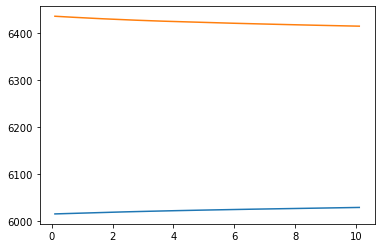

In [20]:
import matplotlib.pyplot as plt
plt.plot(w,tr)
plt.plot(w,ts)

In [21]:
tr = []
ts = []
w = []
q = 0.1
for i in range(0,1000,1):
    q = q + 1
    q = round(q,2)
    w.append(q)
for i in w:
    from sklearn.linear_model import Lasso
    lr = Lasso(alpha = i)
    model = lr.fit(xtrain,ytrain)

    pred_tr = model.predict(xtrain)
    tr_err = round(mean_absolute_error(ytrain,pred_tr),2)

    pred_ts = model.predict(xtest)
    ts_err = round(mean_absolute_error(ytest,pred_ts),2)
    tr.append(tr_err)
    ts.append(ts_err)

    print("==========",i,"===========")
    print(tr_err)
    print(ts_err)
    print(tr_err - ts_err)

========== 1.1 ===========
6017.82
6430.64
-412.8200000000006
========== 2.1 ===========
6019.83
6425.85
-406.02000000000044
========== 3.1 ===========
6021.78
6421.99
-400.21000000000004
========== 4.1 ===========
6023.65
6418.41
-394.7600000000002
========== 5.1 ===========
6025.54
6414.92
-389.3800000000001
========== 6.1 ===========
6027.49
6411.41
-383.9200000000001
========== 7.1 ===========
6029.48
6407.9
-378.4200000000001
========== 8.1 ===========
6031.58
6404.23
-372.64999999999964
========== 9.1 ===========
6033.74
6400.36
-366.6199999999999
========== 10.1 ===========
6036.04
6396.58
-360.53999999999996
========== 11.1 ===========
6038.2
6393.65
-355.4499999999998
========== 12.1 ===========
6040.3
6391.15
-350.84999999999945
========== 13.1 ===========
6042.45
6388.76
-346.3100000000004
========== 14.1 ===========
6044.59
6386.37
-341.77999999999975
========== 15.1 ===========
6046.55
6383.94
-337.3899999999994
========== 16.1 ===========
6048.2
6381.35
-333.1500000000005

========== 136.1 ===========
6121.05
6316.99
-195.9399999999996
========== 137.1 ===========
6121.36
6316.88
-195.52000000000044
========== 138.1 ===========
6121.66
6316.77
-195.11000000000058
========== 139.1 ===========
6121.96
6316.66
-194.69999999999982
========== 140.1 ===========
6122.27
6316.54
-194.26999999999953
========== 141.1 ===========
6122.59
6316.43
-193.84000000000015
========== 142.1 ===========
6122.91
6316.34
-193.4300000000003
========== 143.1 ===========
6123.23
6316.26
-193.03000000000065
========== 144.1 ===========
6123.56
6316.17
-192.60999999999967
========== 145.1 ===========
6123.88
6316.09
-192.21000000000004
========== 146.1 ===========
6124.2
6316.01
-191.8100000000004
========== 147.1 ===========
6124.52
6315.93
-191.40999999999985
========== 148.1 ===========
6124.84
6315.84
-191.0
========== 149.1 ===========
6125.17
6315.76
-190.59000000000015
========== 150.1 ===========
6125.49
6315.68
-190.1900000000005
========== 151.1 ===========
6125.81
6315.6

========== 267.1 ===========
6147.86
6300.64
-152.78000000000065
========== 268.1 ===========
6147.95
6300.5
-152.55000000000018
========== 269.1 ===========
6148.04
6300.37
-152.32999999999993
========== 270.1 ===========
6148.13
6300.23
-152.09999999999945
========== 271.1 ===========
6148.21
6300.1
-151.89000000000033
========== 272.1 ===========
6148.3
6299.96
-151.65999999999985
========== 273.1 ===========
6148.39
6299.82
-151.42999999999938
========== 274.1 ===========
6148.48
6299.69
-151.21000000000004
========== 275.1 ===========
6148.56
6299.55
-150.98999999999978
========== 276.1 ===========
6148.65
6299.42
-150.77000000000044
========== 277.1 ===========
6148.75
6299.28
-150.52999999999975
========== 278.1 ===========
6148.84
6299.15
-150.3099999999995
========== 279.1 ===========
6148.93
6299.02
-150.09000000000015
========== 280.1 ===========
6149.02
6298.89
-149.8699999999999
========== 281.1 ===========
6149.11
6298.76
-149.65000000000055
========== 282.1 ===========
6

========== 401.1 ===========
6161.0
6286.2
-125.19999999999982
========== 402.1 ===========
6161.11
6286.11
-125.0
========== 403.1 ===========
6161.22
6286.02
-124.80000000000018
========== 404.1 ===========
6161.34
6285.92
-124.57999999999993
========== 405.1 ===========
6161.45
6285.83
-124.38000000000011
========== 406.1 ===========
6161.57
6285.73
-124.15999999999985
========== 407.1 ===========
6161.68
6285.64
-123.96000000000004
========== 408.1 ===========
6161.79
6285.55
-123.76000000000022
========== 409.1 ===========
6161.91
6285.45
-123.53999999999996
========== 410.1 ===========
6162.02
6285.36
-123.33999999999924
========== 411.1 ===========
6162.13
6285.27
-123.14000000000033
========== 412.1 ===========
6162.25
6285.17
-122.92000000000007
========== 413.1 ===========
6162.36
6285.08
-122.72000000000025
========== 414.1 ===========
6162.47
6284.99
-122.51999999999953
========== 415.1 ===========
6162.59
6284.89
-122.30000000000018
========== 416.1 ===========
6162.71
628

========== 535.1 ===========
6165.72
6282.08
-116.35999999999967
========== 536.1 ===========
6165.72
6282.08
-116.35999999999967
========== 537.1 ===========
6165.72
6282.08
-116.35999999999967
========== 538.1 ===========
6165.72
6282.08
-116.35999999999967
========== 539.1 ===========
6165.72
6282.08
-116.35999999999967
========== 540.1 ===========
6165.72
6282.08
-116.35999999999967
========== 541.1 ===========
6165.72
6282.08
-116.35999999999967
========== 542.1 ===========
6165.72
6282.08
-116.35999999999967
========== 543.1 ===========
6165.72
6282.08
-116.35999999999967
========== 544.1 ===========
6165.72
6282.08
-116.35999999999967
========== 545.1 ===========
6165.72
6282.08
-116.35999999999967
========== 546.1 ===========
6165.72
6282.08
-116.35999999999967
========== 547.1 ===========
6165.72
6282.08
-116.35999999999967
========== 548.1 ===========
6165.72
6282.08
-116.35999999999967
========== 549.1 ===========
6165.72
6282.08
-116.35999999999967
========== 550.1 ========

========== 670.1 ===========
6165.72
6282.08
-116.35999999999967
========== 671.1 ===========
6165.72
6282.08
-116.35999999999967
========== 672.1 ===========
6165.72
6282.08
-116.35999999999967
========== 673.1 ===========
6165.72
6282.08
-116.35999999999967
========== 674.1 ===========
6165.72
6282.08
-116.35999999999967
========== 675.1 ===========
6165.72
6282.08
-116.35999999999967
========== 676.1 ===========
6165.72
6282.08
-116.35999999999967
========== 677.1 ===========
6165.72
6282.08
-116.35999999999967
========== 678.1 ===========
6165.72
6282.08
-116.35999999999967
========== 679.1 ===========
6165.72
6282.08
-116.35999999999967
========== 680.1 ===========
6165.72
6282.08
-116.35999999999967
========== 681.1 ===========
6165.72
6282.08
-116.35999999999967
========== 682.1 ===========
6165.72
6282.08
-116.35999999999967
========== 683.1 ===========
6165.72
6282.08
-116.35999999999967
========== 684.1 ===========
6165.72
6282.08
-116.35999999999967
========== 685.1 ========

========== 801.1 ===========
6165.72
6282.08
-116.35999999999967
========== 802.1 ===========
6165.72
6282.08
-116.35999999999967
========== 803.1 ===========
6165.72
6282.08
-116.35999999999967
========== 804.1 ===========
6165.72
6282.08
-116.35999999999967
========== 805.1 ===========
6165.72
6282.08
-116.35999999999967
========== 806.1 ===========
6165.72
6282.08
-116.35999999999967
========== 807.1 ===========
6165.72
6282.08
-116.35999999999967
========== 808.1 ===========
6165.72
6282.08
-116.35999999999967
========== 809.1 ===========
6165.72
6282.08
-116.35999999999967
========== 810.1 ===========
6165.72
6282.08
-116.35999999999967
========== 811.1 ===========
6165.72
6282.08
-116.35999999999967
========== 812.1 ===========
6165.72
6282.08
-116.35999999999967
========== 813.1 ===========
6165.72
6282.08
-116.35999999999967
========== 814.1 ===========
6165.72
6282.08
-116.35999999999967
========== 815.1 ===========
6165.72
6282.08
-116.35999999999967
========== 816.1 ========

========== 934.1 ===========
6165.72
6282.08
-116.35999999999967
========== 935.1 ===========
6165.72
6282.08
-116.35999999999967
========== 936.1 ===========
6165.72
6282.08
-116.35999999999967
========== 937.1 ===========
6165.72
6282.08
-116.35999999999967
========== 938.1 ===========
6165.72
6282.08
-116.35999999999967
========== 939.1 ===========
6165.72
6282.08
-116.35999999999967
========== 940.1 ===========
6165.72
6282.08
-116.35999999999967
========== 941.1 ===========
6165.72
6282.08
-116.35999999999967
========== 942.1 ===========
6165.72
6282.08
-116.35999999999967
========== 943.1 ===========
6165.72
6282.08
-116.35999999999967
========== 944.1 ===========
6165.72
6282.08
-116.35999999999967
========== 945.1 ===========
6165.72
6282.08
-116.35999999999967
========== 946.1 ===========
6165.72
6282.08
-116.35999999999967
========== 947.1 ===========
6165.72
6282.08
-116.35999999999967
========== 948.1 ===========
6165.72
6282.08
-116.35999999999967
========== 949.1 ========

Lasso Reduces error
At value of alpha 456.1 error diff is 116.97 

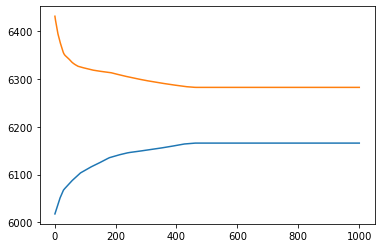

In [22]:
import matplotlib.pyplot as plt
plt.plot(w,tr)
plt.plot(w,ts)

# KNN

In [23]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=5)
model = knr.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
tr_err = mean_absolute_error(ytrain,pred_tr)
ts_err = mean_absolute_error(ytest,pred_ts)

In [24]:
tr_err

5409.387925170068

In [25]:
ts_err

6664.180952380952

In [26]:
tr = []
ts = []
for k in range(2,100):
    from sklearn.neighbors import KNeighborsRegressor
    knr = KNeighborsRegressor(n_neighbors=k)
    model = knr.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = mean_absolute_error(ytrain,pred_tr)
    ts_err = mean_absolute_error(ytest,pred_ts)
    tr.append(tr_err)
    ts.append(ts_err)
    print(k,tr_err,ts_err)

2 4299.631377551021 6957.505102040816
3 4930.996315192744 6879.097505668935
4 5207.525935374149 6735.131802721088
5 5409.387925170068 6664.180952380952
6 5557.678146258503 6661.349206349207
7 5672.818027210885 6601.274538386782
8 5718.3858418367345 6404.761479591837
9 5764.508597883598 6319.795162509448
10 5817.35212585034 6296.085034013606
11 5843.9474335188615 6251.306740878169
12 5860.147675736961 6252.442743764172
13 5888.726452119308 6269.614861329147
14 5913.6886540330415 6288.969144800778
15 5908.707936507936 6281.071655328799
16 5928.703975340136 6307.6188350340135
17 5958.990696278512 6368.934173669468
18 5984.007369614513 6345.009637188208
19 5971.255639097743 6336.253311851056
20 5968.7442176870745 6320.541496598639
21 5986.518343051506 6339.737609329447
22 5999.288149350649 6313.513605442177
23 6006.538450162674 6280.14892043774
24 6011.79435941043 6282.1605725623585
25 6018.170748299321 6289.845578231293
26 6013.55151098901 6267.495028780743
27 6003.960506424792 6284.26883

([<matplotlib.axis.XTick at 0x1e807d46c70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

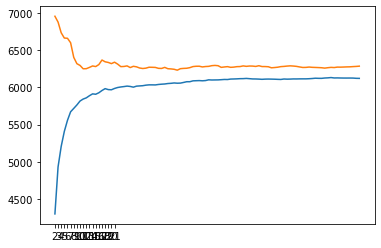

In [27]:
import matplotlib.pyplot as plt
k = range(2,100)
plt.plot(k,tr)
plt.plot(k,ts)
plt.xticks(range(2,22,1))
#plt.plot(k,ts)

In [28]:
from sklearn.model_selection import GridSearchCV
tg = {"n_neighbors":range(2,100,1)}
knr = KNeighborsRegressor()
cv = GridSearchCV(knr,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'n_neighbors': 98}

In [29]:
knr = KNeighborsRegressor(n_neighbors=98)
model = knr.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
tr_err = mean_absolute_error(ytrain,pred_tr)
ts_err = mean_absolute_error(ytest,pred_ts)
print(tr_err)
print(ts_err)

6122.9921386922115
6282.74944467583


Diff is 160

# DTR

In [30]:
dtr = DecisionTreeRegressor(criterion="mse",random_state=21,max_depth=1)
modeldtr = dtr.fit(xtrain,ytrain)
pred_tr = modeldtr.predict(xtrain)
pred_ts = modeldtr.predict(xtest)

tr_err = mean_absolute_error(ytrain,pred_tr)
ts_err = mean_absolute_error(ytest,pred_ts)
print(tr_err)
print(ts_err)

6136.879445991291
6255.2575767509825


In [31]:
dtr = DecisionTreeRegressor(criterion="mse",random_state=21)
modeldtr = dtr.fit(xtrain,ytrain)
pred_tr = modeldtr.predict(xtrain)
pred_ts = modeldtr.predict(xtest)

tr_err = mean_absolute_error(ytrain,pred_tr)
ts_err = mean_absolute_error(ytest,pred_ts)
print(tr_err)
print(ts_err)

0.0
8285.377551020409


In [32]:
tr = []
ts = []
for i in range(2,100,1):
    dtr = DecisionTreeRegressor(criterion="mse",random_state=21,min_samples_leaf=i)
    modeldtr = dtr.fit(xtrain,ytrain)
    pred_tr = modeldtr.predict(xtrain)
    pred_ts = modeldtr.predict(xtest)

    tr_err = mean_absolute_error(ytrain,pred_tr)
    ts_err = mean_absolute_error(ytest,pred_ts)
    print("train_err",tr_err)
    print("test_err",ts_err)
    tr.append(tr_err)
    ts.append(ts_err)

train_err 1222.7893990929704
test_err 8403.069160997733
train_err 2103.2774943310656
test_err 8379.051700680271
train_err 2802.9348720440557
test_err 7846.284248461288
train_err 3329.1619911456646
test_err 7339.487085627902
train_err 3596.889104296119
test_err 7213.7723441902
train_err 4031.0138609076116
test_err 7069.507051631285
train_err 4180.935924199573
test_err 7094.263304826315
train_err 4375.818654486436
test_err 7063.572297526514
train_err 4539.860504993662
test_err 6987.599695274322
train_err 4701.66117511747
test_err 6857.42062806083
train_err 4760.857690861615
test_err 6880.142226639562
train_err 4870.396745304493
test_err 6550.415124037394
train_err 5016.572467563469
test_err 6448.694460515578
train_err 5068.565659604243
test_err 6478.505371353641
train_err 5107.228524604776
test_err 6519.179999388035
train_err 5154.295806676036
test_err 6533.489151338916
train_err 5199.331638279278
test_err 6542.778145509683
train_err 5267.216482502771
test_err 6534.1136311691625
train_er

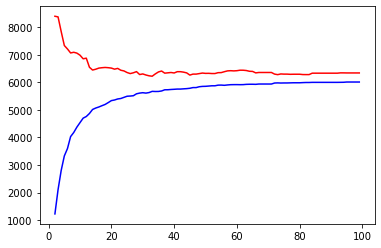

In [33]:
import matplotlib.pyplot as plt
plt.plot(range(2,100,1),tr,c="blue")
plt.plot(range(2,100,1),ts,c="red")

In [34]:
    dtr = DecisionTreeRegressor(criterion="mse",random_state=21,min_samples_leaf=99)
    modeldtr = dtr.fit(xtrain,ytrain)
    pred_tr = modeldtr.predict(xtrain)
    pred_ts = modeldtr.predict(xtest)

    tr_err = mean_absolute_error(ytrain,pred_tr)
    ts_err = mean_absolute_error(ytest,pred_ts)
    print("train_err",tr_err)
    print("test_err",ts_err)

train_err 6013.671155674958
test_err 6343.42235937025


In [35]:
from sklearn.model_selection import GridSearchCV
tg = {"min_samples_leaf":range(2,100,1)}
dtr = DecisionTreeRegressor()
cv = GridSearchCV(dtr,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_leaf': 99}

In [36]:
from sklearn.model_selection import GridSearchCV
tg = {"min_samples_split":range(2,100,1)}
dtr = DecisionTreeRegressor()
cv = GridSearchCV(dtr,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_split': 97}

In [37]:
    dtr = DecisionTreeRegressor(criterion="mse",random_state=21,min_samples_split=97)
    modeldtr = dtr.fit(xtrain,ytrain)
    pred_tr = modeldtr.predict(xtrain)
    pred_ts = modeldtr.predict(xtest)

    tr_err = mean_absolute_error(ytrain,pred_tr)
    ts_err = mean_absolute_error(ytest,pred_ts)
    print("train_err",tr_err)
    print("test_err",ts_err)

train_err 5550.46527555991
test_err 6506.419029913362


# Adaboost regressor

In [38]:
from sklearn.ensemble import AdaBoostRegressor
dtr = DecisionTreeRegressor(criterion="mse",random_state=21)
adr =AdaBoostRegressor(n_estimators=k)
modeldtr = dtr.fit(xtrain,ytrain)
pred_tr = modeldtr.predict(xtrain)
pred_ts = modeldtr.predict(xtest)

tr_err = mean_absolute_error(ytrain,pred_tr)
ts_err = mean_absolute_error(ytest,pred_ts)
print(tr_err)
print(ts_err)

0.0
8285.377551020409


In [39]:
from sklearn.model_selection import GridSearchCV
tg = {"n_estimators":range(2,100,1)}
dtr = DecisionTreeRegressor()
adr = AdaBoostRegressor()
cv = GridSearchCV(adr,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'n_estimators': 42}

In [40]:
from sklearn.ensemble import AdaBoostRegressor
dtr = DecisionTreeRegressor(criterion="mse",random_state=21,max_depth=1)
adr =AdaBoostRegressor(dtr,n_estimators=6)
modeldtr = dtr.fit(xtrain,ytrain)
pred_tr = modeldtr.predict(xtrain)
pred_ts = modeldtr.predict(xtest)

tr_err = mean_absolute_error(ytrain,pred_tr)
ts_err = mean_absolute_error(ytest,pred_ts)
print(tr_err)
print(ts_err)

6136.879445991291
6255.2575767509825


# Random Forest Regressor

In [41]:
rfr = RandomForestRegressor(n_estimators=44,criterion="mse",random_state=21,max_depth=1)
model = rfr.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err = mean_squared_error(ytrain,pred_tr)
ts_err = mean_squared_error(ytest,pred_ts)
print(tr_err)
print(ts_err)

49706484.603024684
52048301.3168183


In [42]:
from sklearn.model_selection import GridSearchCV
tg = {"n_estimators":range(2,100,1)}
rfr =RandomForestRegressor()
cv = GridSearchCV(rfr,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'n_estimators': 75}

In [43]:
Xnew.shape

(1470, 55)

# Neural Network

In [44]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

nn = Sequential()
nn.add(Dense(60,input_dim=Xnew.shape[1]))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1,activation="relu"))

In [45]:
nn.compile(loss="mae")

In [46]:
model = nn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=100)

Epoch 1/100
37/37 [==============================] - 1s 7ms/step - loss: 14059.2393 - val_loss: 15233.3828
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 13996.7148 - val_loss: 15139.9404
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 13867.9717 - val_loss: 14971.9375
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 13654.9707 - val_loss: 14712.1260
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 13342.4775 - val_loss: 14344.2549
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 12911.7148 - val_loss: 13851.5898
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 12348.0811 - val_loss: 13217.5566
Epoch 8/100
37/37 [==============================] - 0s 3ms/step - loss: 11644.2910 - val_loss: 12442.4844
Epoch 9/100
37/37 [==============================] - 0s 3ms/step - loss: 10830.5381 - val_loss: 11560.2812
Epoch 10/100
37/37 [=================

37/37 [==============================] - 0s 3ms/step - loss: 6003.1685 - val_loss: 6485.4966
Epoch 79/100
37/37 [==============================] - 0s 3ms/step - loss: 6058.2124 - val_loss: 6504.3276
Epoch 80/100
37/37 [==============================] - 0s 3ms/step - loss: 6088.9712 - val_loss: 6488.5278
Epoch 81/100
37/37 [==============================] - 0s 3ms/step - loss: 6035.0327 - val_loss: 6494.6157
Epoch 82/100
37/37 [==============================] - 0s 3ms/step - loss: 5992.6182 - val_loss: 6493.1333
Epoch 83/100
37/37 [==============================] - 0s 3ms/step - loss: 6016.8892 - val_loss: 6499.2983
Epoch 84/100
37/37 [==============================] - 0s 3ms/step - loss: 5981.0278 - val_loss: 6499.0703
Epoch 85/100
37/37 [==============================] - 0s 3ms/step - loss: 6043.5195 - val_loss: 6501.9595
Epoch 86/100
37/37 [==============================] - 0s 3ms/step - loss: 6040.3120 - val_loss: 6499.4336
Epoch 87/100
37/37 [==============================] - 0s 3m

In [47]:
loss = model.history["loss"]
val_loss = model.history["val_loss"]

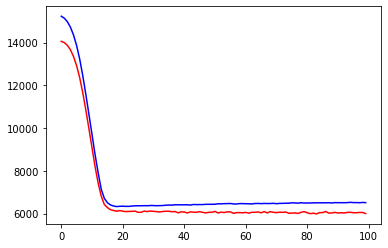

In [48]:
p = range(0,100,1)
plt.plot(p,loss,c="red")
plt.plot(p,val_loss,c="blue")